In [2]:
import pandas as pd
%matplotlib inline

In [3]:
# Part 1: Get Data

df = pd.read_csv('PythonS&P500.csv')
df.columns = df.columns.str.strip()

In [4]:
# Part 2: Calculate the inputs that go into the 200 SMA Model

df['% Change'] = df['Day Close Price'].pct_change()
df['200 SMA'] = df['Day Close Price'].rolling(window=200).mean().round(5)


In [5]:
# Part 3: Models' Criteria

df['Criteria 1'] = df['Day Close Price'] >= df['200 SMA']

In [6]:
# Part 4: Calculate the Models
df['buy and hold'] = 100*(1+df['% Change']).cumprod() 
df['200 SMA Model'] = 100*(1+df['Criteria 1'].shift(1)*df['% Change']).cumprod()

In [7]:
# Part 5: Calculate the models' returns

#200 sma model's returns
start_model1=df['200 SMA Model'].iloc[200]
end_model1=df['200 SMA Model'].iloc[-1]
years=(df['200 SMA Model'].count()+1-200)/252
model1_average_return = (end_model1/start_model1)**(1/years)-1
print('200 SMA Model yields an average of',model1_average_return*100,'% per year')

#buy and hold's returns
start_spx = df['Day Close Price'].iloc[200]
end_spx = df['Day Close Price'].iloc[-1]
spx_average_return = (end_spx/start_spx)**(1/years)-1
print('Buy and hold yields and average of',spx_average_return*100,'% per year')

200 SMA Model yields an average of 6.336940480223774 % per year
Buy and hold yields and average of 5.389780242829945 % per year


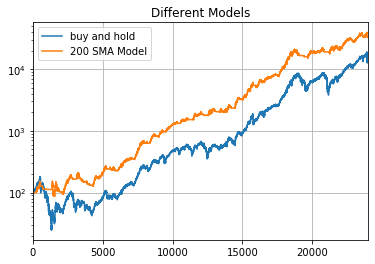

In [8]:
#Part 6: Plot the models

df[['buy and hold','200 SMA Model']].plot(grid=True,kind='line',title = 'Different Models',logy=True)